<a href="https://colab.research.google.com/github/joaovictoramaralgoncalves/Projetos_de_aprendizado/blob/master/Modulo_2_Basic_Visualization_Tools_Continued.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modulo 2 - Basic Visualization Tools Continued

OBSERVAÇÕES GERAIS
' Para abrir R no Google Colab basta usar o código: https://colab.research.google.com/#create=true&language=r


In [9]:
## Bibliotecas ##
#################
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Gráfico de Dispersão Básico

'mtcars <- o conjunto de dados integrado, que rastreia 11 variáveis para automóveis de 1973 a 1974. <br></br>
mpg <- significa milhas por galão; e <br></br>
wt <- significa peso.
Cada ponto na saída representa as milhas por galão e o peso de um automóvel.'


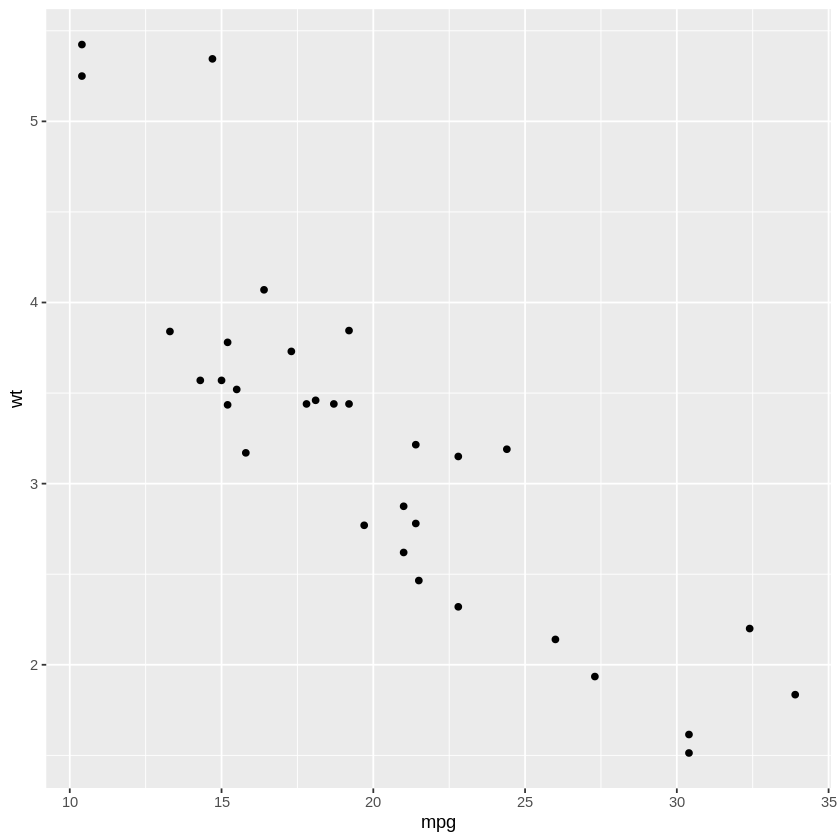

In [7]:
qplot(mpg,wt, data=mtcars)

## mudando a forma dos pontos
Em 'shape = 1', pode colocar qualquer número maior que 0.<br>
*shepe =19 é o mesmo formato que se não colocar a função:
'geom_point(shape = 19)'

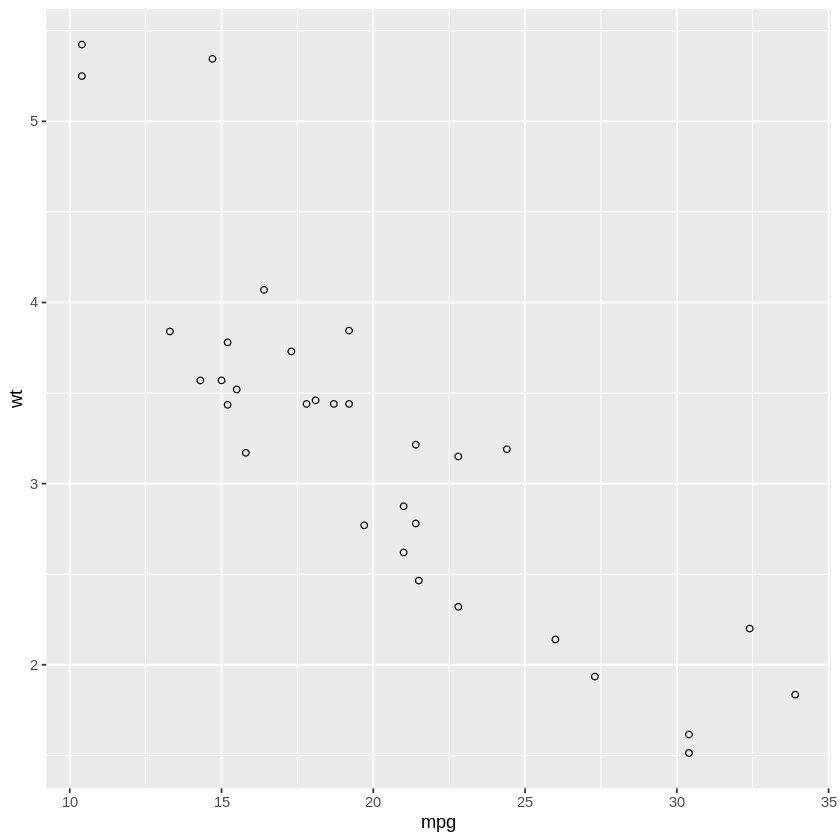

In [9]:
ggplot(mtcars, aes(x = mpg, y = wt)) + 
  geom_point(shape = 1)

## três variáveis em um shape
Além de milhas por galão e peso adicionei o número de cilindros.

[1] "agora podemos ver como fica essa dispersão de três variáveis."

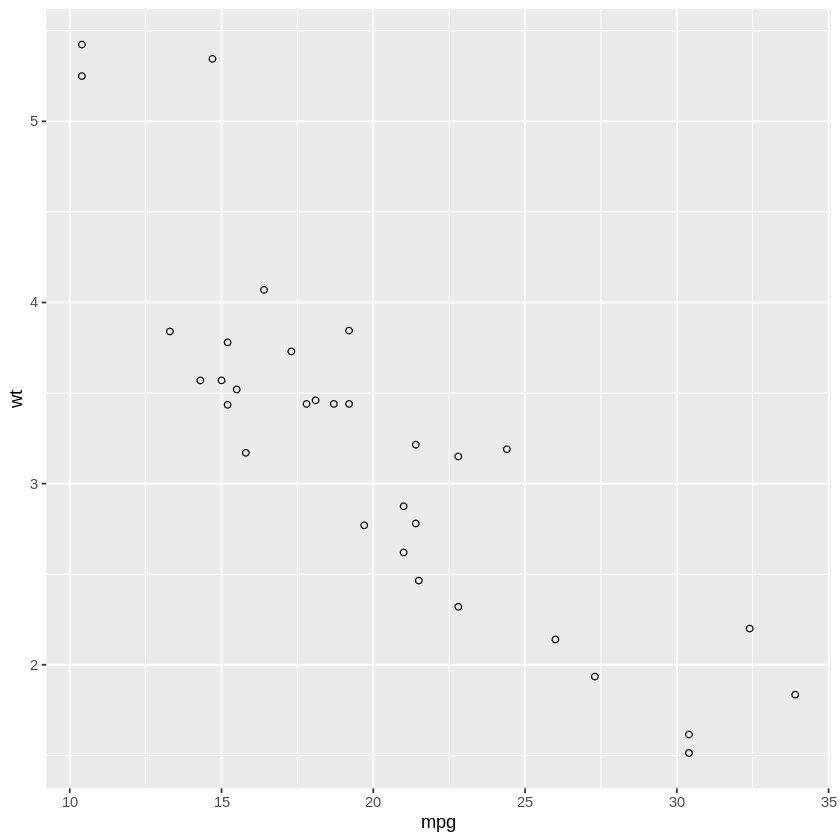

In [11]:
mtcars$cylFactor <- factor(mtcars$cyl)

'agora podemos ver como fica essa dispersão de três variáveis.'
ggplot(mtcars, aes(x=mpg, y=wt, shape=cylFactor)) +
  geom_point(shape = 1)

## mudando a cor dos dados no gráfico


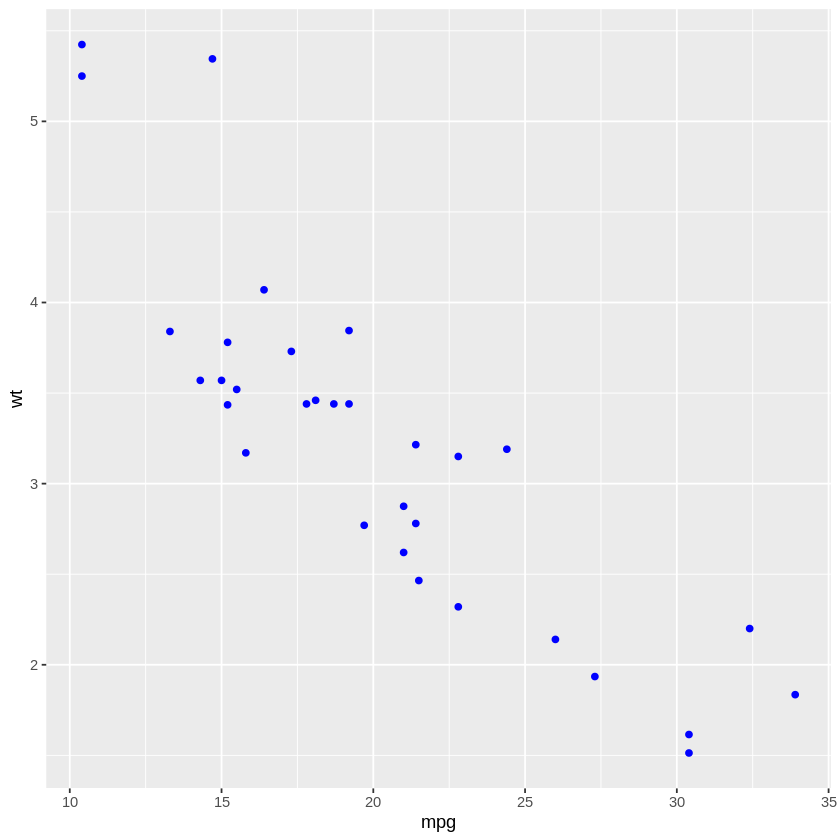

In [12]:
ggplot(mtcars, aes(x=mpg,y=wt)) +
  geom_point(shape = 19, colour="blue")

## cor por numeração
Assim podemos ver como os dados se dispersão em relação a cor de cada um

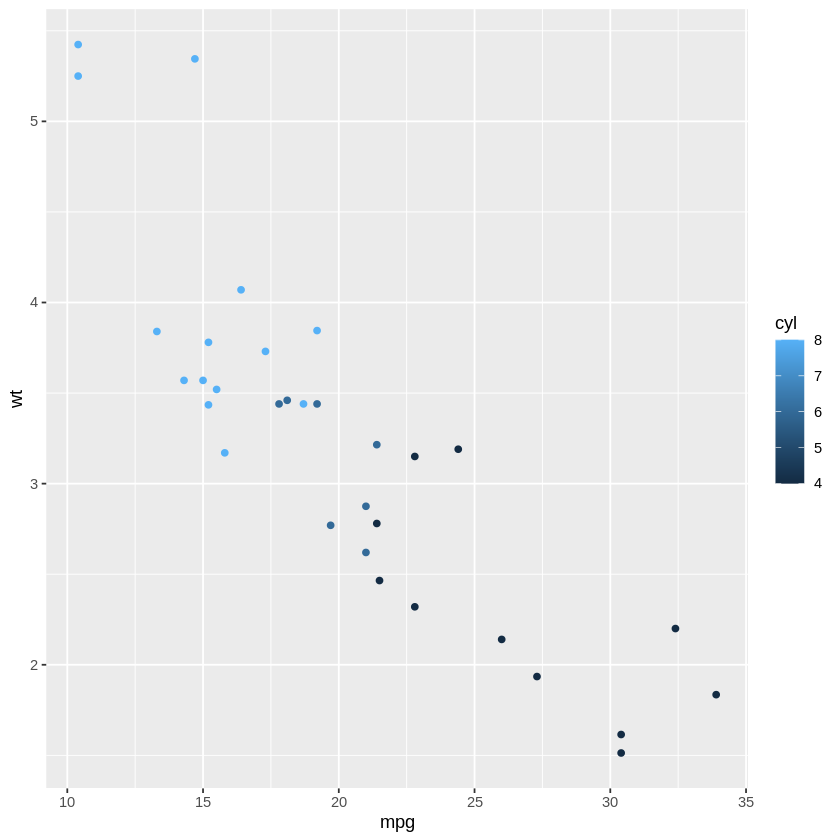

In [13]:
ggplot(mtcars, aes(x=mpg, y=wt, color = cyl)) +
  geom_point(shape = 19)

## Cor por categoria usando a variável mtcars$cylFactor que criamos mais cedo
Podemos entender melhor o que está acontecendo com cada variável.

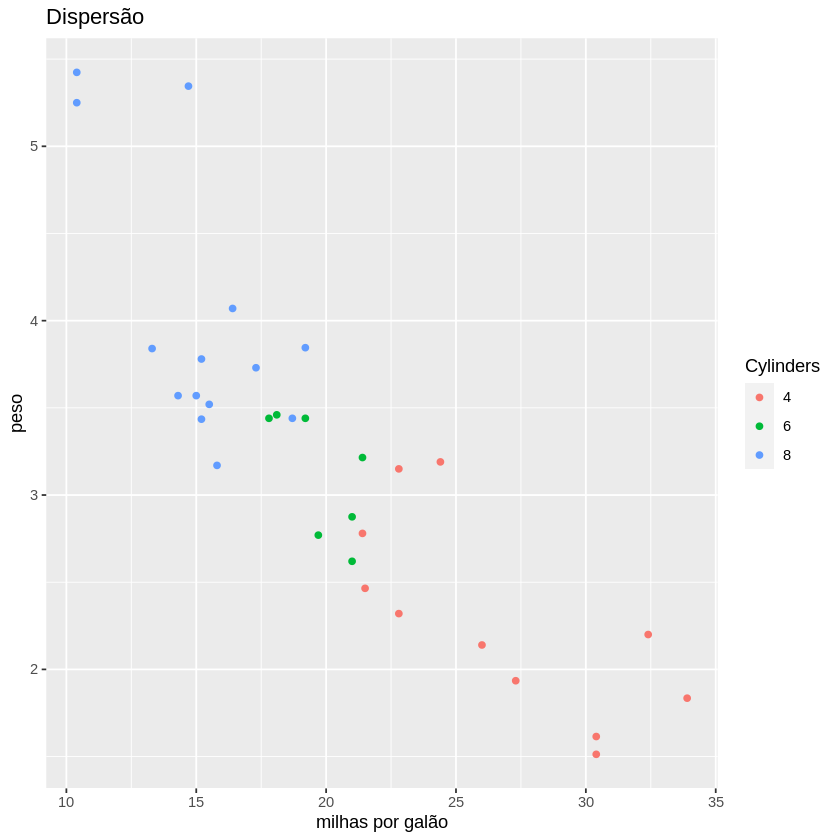

In [14]:
ggplot(mtcars, aes(x=mpg,y=wt,color=cylFactor)) +
  geom_point(shape=19)+
  xlab("milhas por galão") +    #eixo x nome
  ylab("peso") +    # eixo y nome
  labs(colour = "Cylinders") +    #mudando o nome da legenda
  ggtitle("Dispersão")    #mudando o nome do título

# Gráficos de linha e regressão


In [7]:
EuStockDF <- as.data.frame(EuStockMarkets)

head(EuStockDF)

,DAX,SMI,CAC,FTSE
,<dbl>,<dbl>,<dbl>,<dbl>
1,1628.75,1678.1,1772.8,2443.6
2,1613.63,1688.5,1750.5,2460.2
3,1606.51,1678.6,1718.0,2448.2
4,1621.04,1684.1,1708.1,2470.4
5,1618.16,1686.6,1723.1,2484.7
6,1610.61,1671.6,1714.3,2466.8


## Criando gráfico de linhas


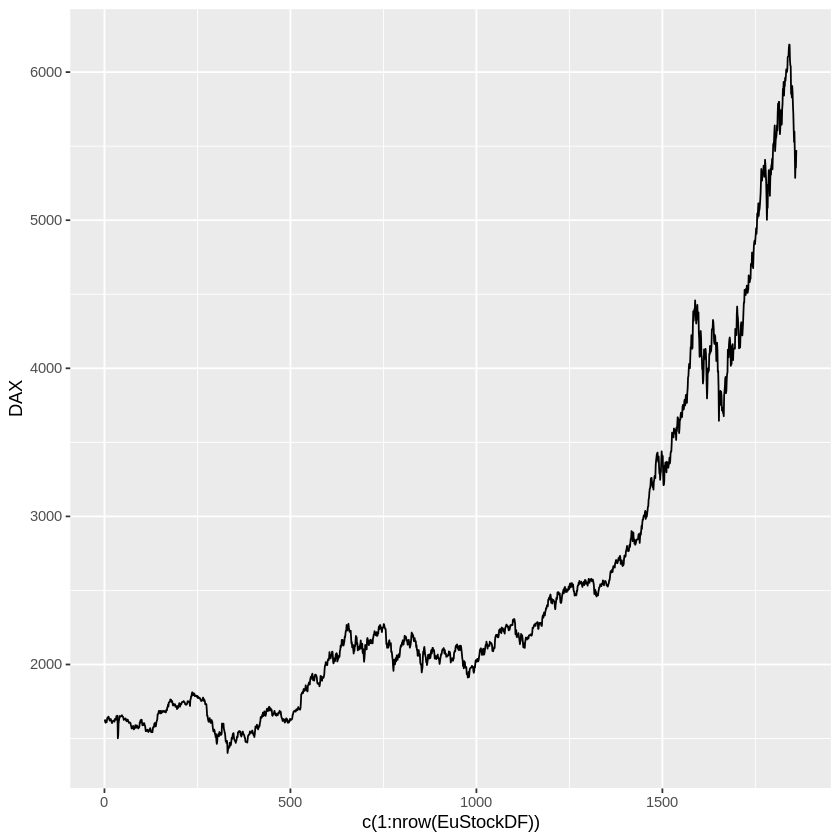

In [10]:
ggplot(EuStockDF, aes(x=c(1:nrow(EuStockDF)),y=DAX))+
  geom_line()

[1] "eixo x é cada linha e eixo y é a coluna escolhida para o gráfico\nPara mudar o tamanho da linha você pode usar o método geom_line()"

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


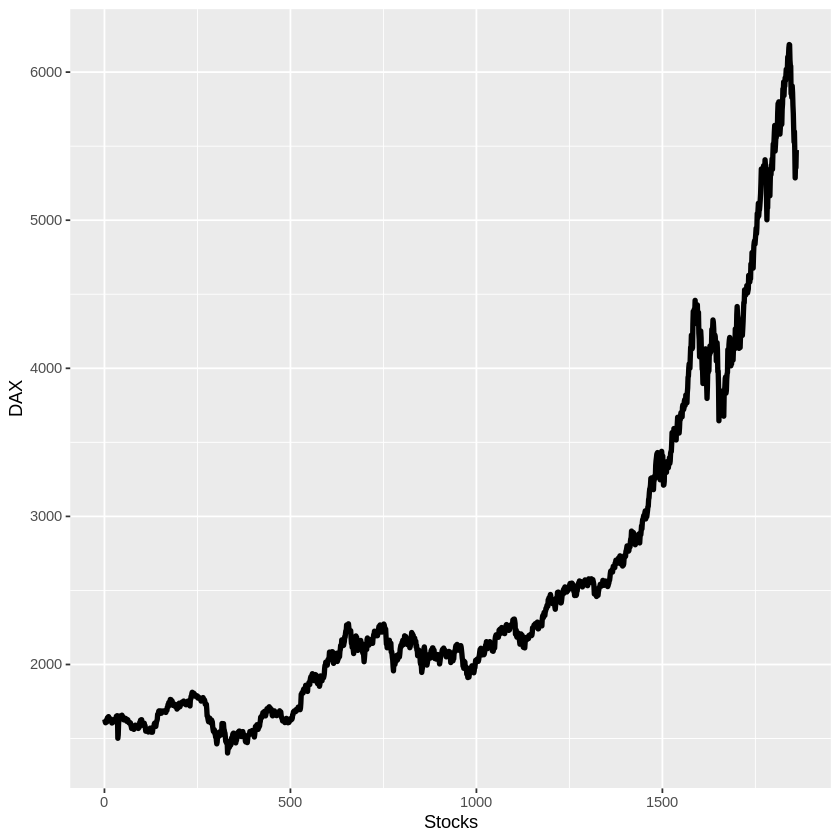

In [11]:
'eixo x é cada linha e eixo y é a coluna escolhida para o gráfico
Para mudar o tamanho da linha você pode usar o método geom_line()'
ggplot(EuStockDF, aes(x=c(1:nrow(EuStockDF)),y=DAX))+
         geom_line(size=1.5) +    # largura da linha
         labs(x = "Stocks")    # Para mudar o nome de um eixo

### Mudando a cor do gráfico de linhas

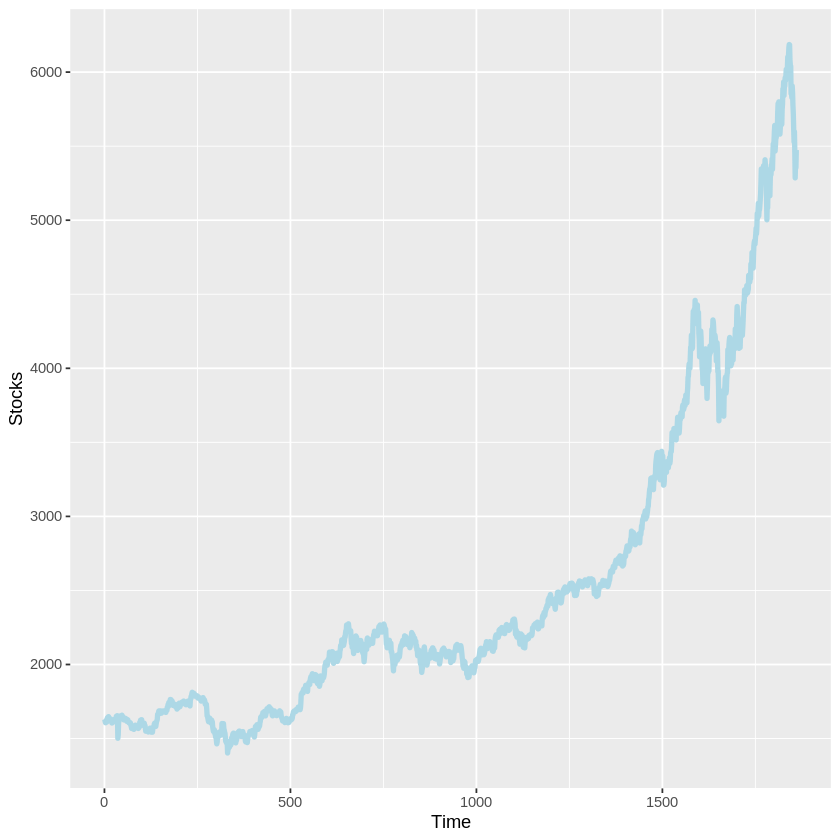

In [12]:
### Mudando a cor do gráfico de linhas
ggplot(EuStockDF, aes(x=c(1:nrow(EuStockDF)), y=DAX)) +
  geom_line(size=1.5, colour="light blue") +    #cor da linha
  labs(x="Time", y="Stocks")

## Gráfico com várias linhas
basta colocar várias vezes o método goem_line e descrever
a base que deve usar em cada, como no exemplo a baixo

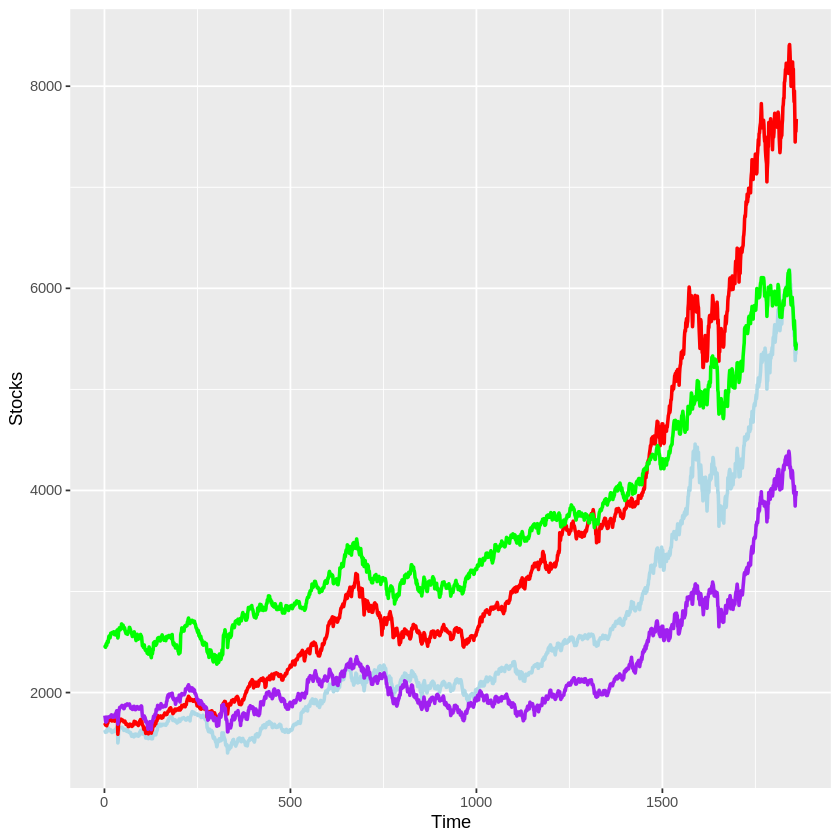

In [13]:
all_stocks <- ggplot() +
  geom_line(data=EuStockDF,aes(x=c(1:nrow(EuStockDF)), y = DAX),
            size=1, colour="light blue") +
  geom_line(data=EuStockDF,aes(x=c(1:nrow(EuStockDF)),y=SMI),
            size=1, colour="red") +
  geom_line(data =EuStockDF,aes(x=c(1:nrow(EuStockDF)), y=CAC),
            size=1, colour="purple") +
  geom_line(data=EuStockDF,aes(x=c(1:nrow(EuStockDF)),y=FTSE),
            size=1, colour="green")+
  labs(x="Time", y="Stocks")

print(all_stocks)

### Colocar Rótulos

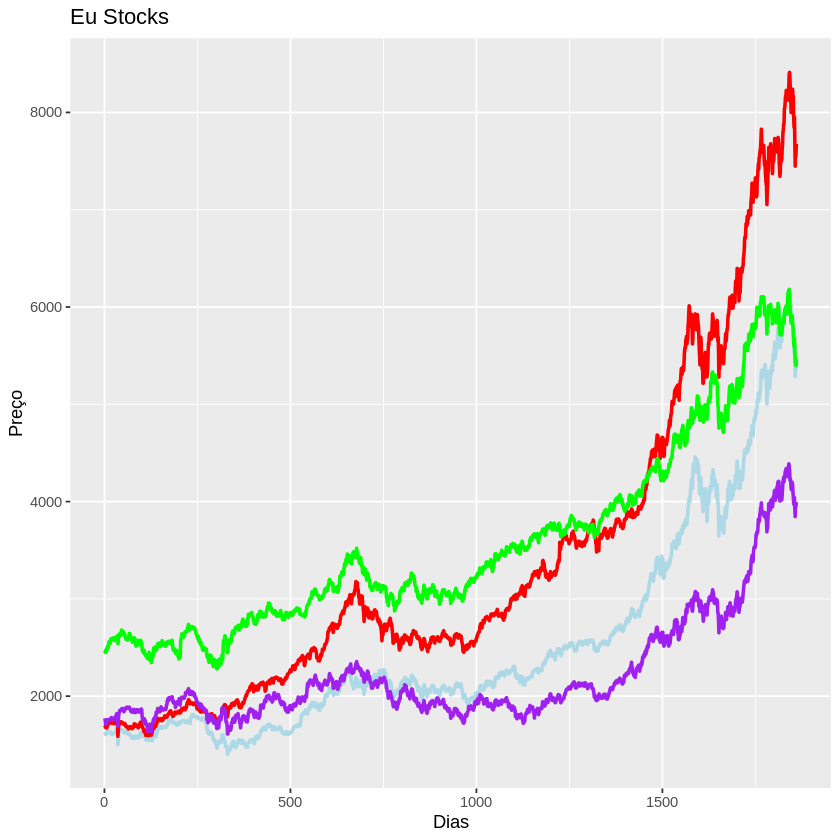

In [15]:
legend_stocks <-all_stocks +    # usei o que acabamos de criar
  xlab("Dias") +
  ylab("Preço") +
  ggtitle("Eu Stocks")

print(legend_stocks)

## Regressão linear

É uma abordagem matemática para ajustar uma função linear a 
um conjunto de dados. 
Em duas dimensões, a regressão linear é uma maneira de 
encontrar a linha de melhor ajuste nesse gráfico estamos representando milhas/por galão em relação ao peso.

`geom_smooth()` using formula = 'y ~ x'


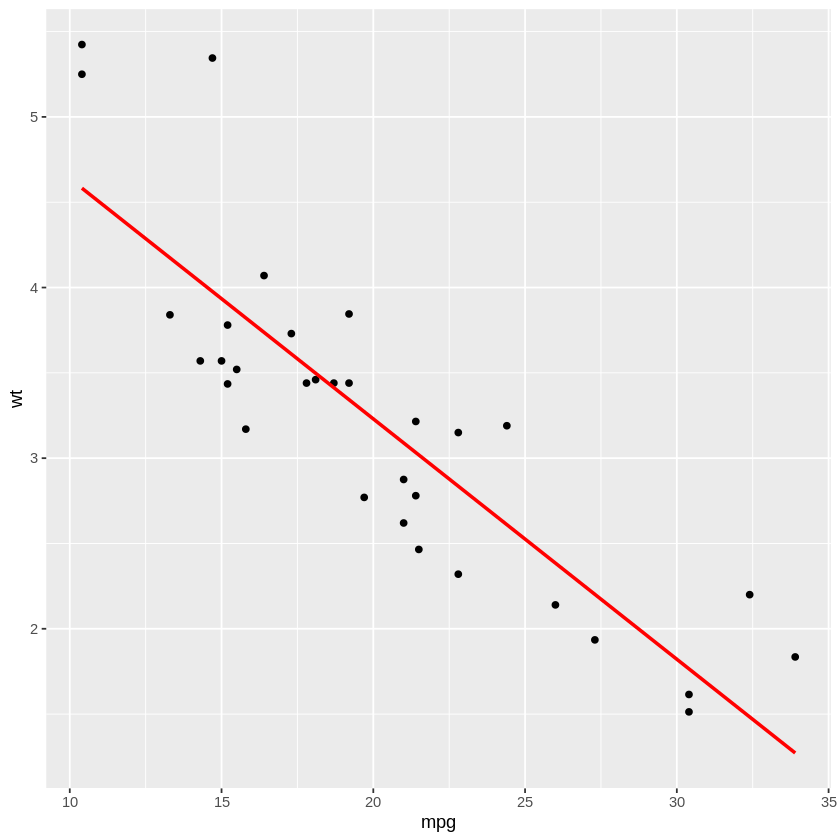

In [16]:
ggplot(mtcars,aes(x=mpg,y=wt)) +
  geom_point(shape=19) +
  geom_smooth(method="lm",se=FALSE,color="red")

no exemplo a cima os carros com cilindros diferentes estão
no mesmo formato, podemos categorizar por cores.

`geom_smooth()` using formula = 'y ~ x'


[1] "a margem nesse modelo por padrão é construída de modo que tenha 95% de confiança"

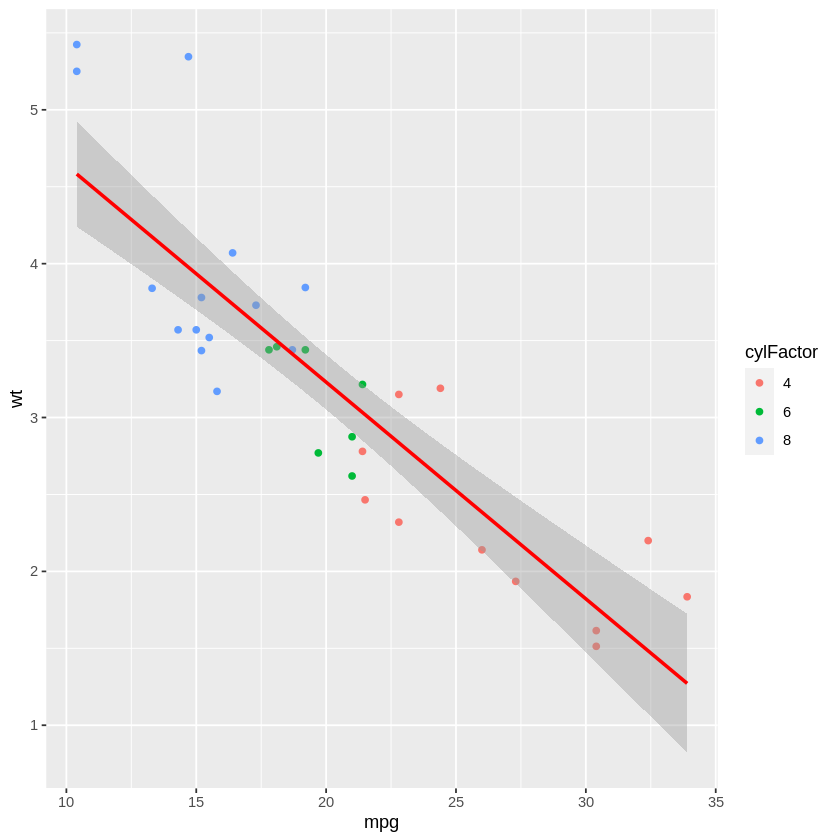

In [19]:
mtcars$cylFactor <- factor(mtcars$cyl)    # n° de cilindros

regressao <- ggplot(mtcars,aes(x=mpg,y=wt,color=cylFactor)) +
  geom_point(shape=19) +
  geom_smooth(method="lm",se=TRUE,color="red")

regressao

'a margem nesse modelo por padrão é construída de modo que tenha 95% de confiança'

### adicionando rótulos aos gráficos


`geom_smooth()` using formula = 'y ~ x'


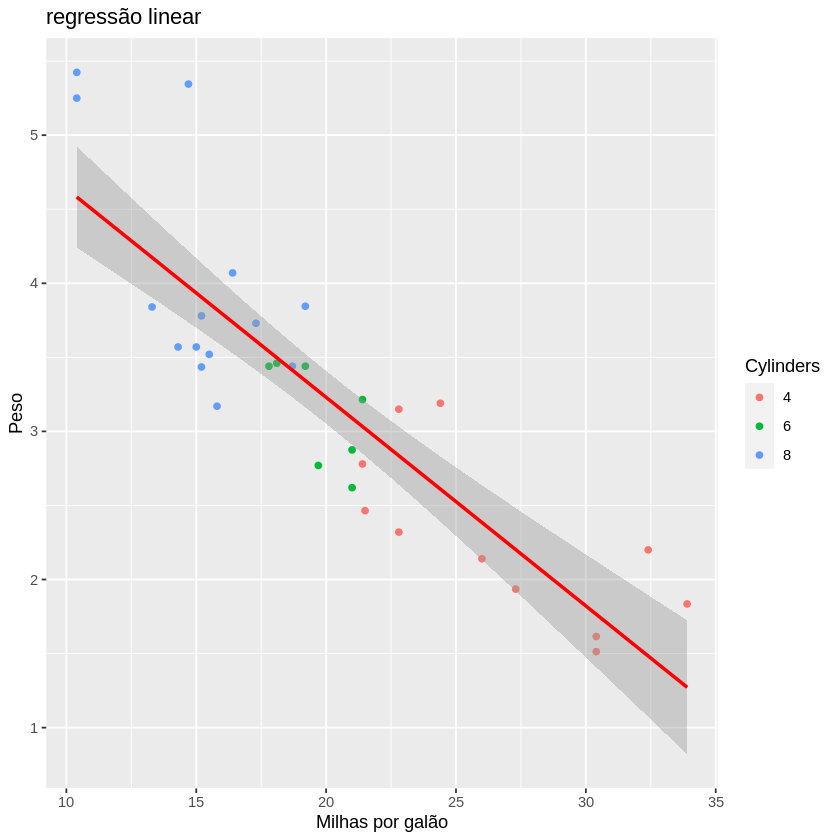

In [21]:
regressao +
  xlab("Milhas por galão") +
  ylab("Peso") +
  labs(colour="Cylinders") +
  ggtitle("regressão linear")

## Modelo Gaussiano

no mesmo modelo da regressão linear podemos usar auto no
atributo method

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


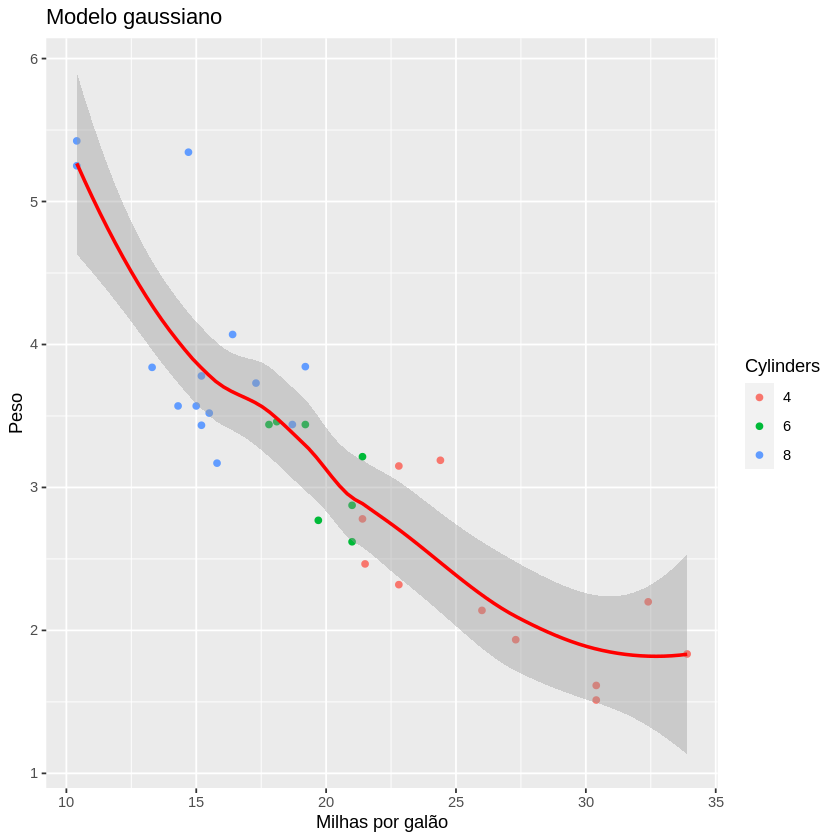

In [24]:
ggplot(mtcars,aes(x=mpg,y=wt,color=cylFactor)) +
  geom_point(shape=19) +
  geom_smooth(method="auto",se=TRUE,color="red") +
  xlab("Milhas por galão") +
  ylab("Peso") +
  labs(colour="Cylinders") +
  ggtitle("Modelo gaussiano")